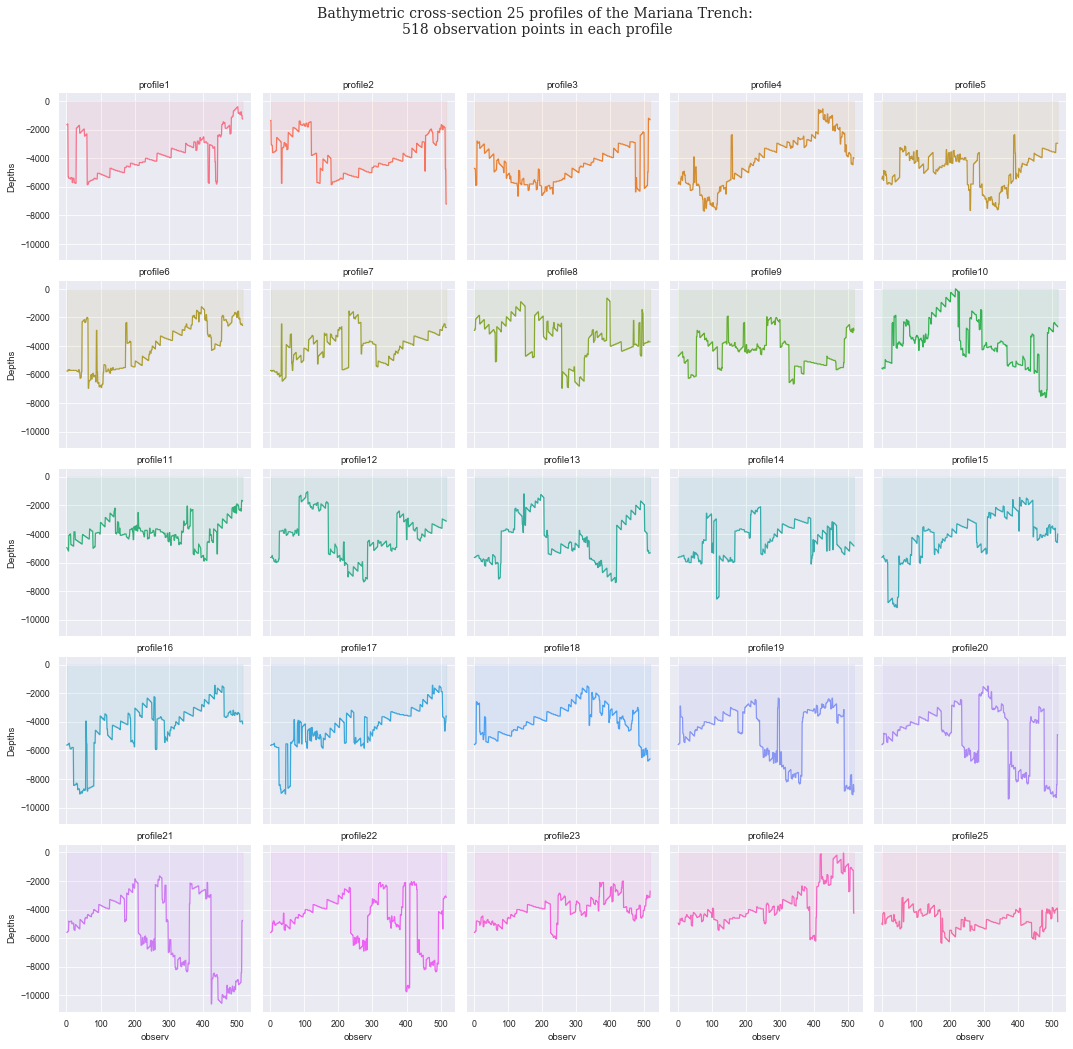

In [2]:
#!/usr/bin/env python
# coding: utf-8
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style('darkgrid')
sb.set_context('paper')

os.chdir('/Users/pauline/Documents/Python')

# defining a loop
profiles_nrs = list(map(lambda x: x, range(25)))
profiles_list = []
for i in profiles_nrs:
    profiles_list.append('profile{}'.format(i + 1))

# generating data frame
dfM = pd.read_csv("Tab-Bathy.csv")
df = dfM.melt(id_vars=['observ'], 
              value_vars=profiles_list,
              var_name='Profiles', value_name='Depths'
              )

# initializing grid
g = sb.FacetGrid(df, col='Profiles', hue='Profiles', col_wrap=5)
g.fig.suptitle('Mariana Trench: 25 cross-section profiles with \n518 samples in each',
               fontsize=14, fontfamily='serif'
               )
# add line
g.map(plt.plot, 'observ', 'Depths')
# fill area
g.map(plt.fill_between, 'observ', 'Depths', alpha=0.1
          ).set_titles("{col_name} Profile")
g.set_titles("{col_name}")


g.fig.suptitle('Bathymetric cross-section 25 profiles of the Mariana Trench: \n518 observation points in each profile',
               fontsize=14, fontfamily='serif'
               )

# visualizing
plt.tight_layout()
plt.subplots_adjust(bottom=0.05,top=0.90)
plt.savefig('plot_FacetGrid.png', dpi=300)
plt.show()
